In [6]:
###############################################################################
############################## 1. SETUP ######################################
###############################################################################
import sys
sys.path.append('../src')

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, utils
import matplotlib.pyplot as plt
import numpy as np
from model import FashionCNN
from training import train_model, test_model, save_model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
           'Sandal','Shirt','Sneaker','Bag','Ankle Boot']

Using device: cpu


In [7]:
###############################################################################
############################## 2. DATA #######################################
###############################################################################
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='../data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='../data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

In [9]:
###############################################################################
############################## 3. MODEL ######################################
###############################################################################
model = FashionCNN().to(device)
print(model)

FashionCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.25, inplace=False)
)


In [10]:
###############################################################################
############################## 4. QUICK TRAINING #############################
###############################################################################
epochs = 3
train_model(model, train_loader, device, epochs=epochs)

Epoch [1/3] Loss: 0.5193
Epoch [2/3] Loss: 0.3281
Epoch [3/3] Loss: 0.2794


In [11]:
###############################################################################
############################## 5. EVALUATION #################################
###############################################################################
accuracy = test_model(model, test_loader, device)
print(f"Demo Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 90.07%
Demo Test Accuracy: 90.07%


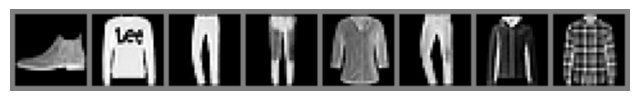

Predicted:  Ankle Boot Pullover Trouser Trouser Shirt Trouser Coat Shirt
Actual:     Ankle Boot Pullover Trouser Trouser Shirt Trouser Coat Shirt


In [12]:
###############################################################################
############################## 6. VISUALIZE PREDICTIONS ######################
###############################################################################
dataiter = iter(test_loader)
images, labels = next(dataiter)

model.eval()
outputs = model(images.to(device))
_, predicted = torch.max(outputs, 1)

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.figure(figsize=(8,6))
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.axis('off')
    plt.show()

imshow(utils.make_grid(images[:8]))
print("Predicted: ", ' '.join(f"{classes[p]}" for p in predicted[:8]))
print("Actual:    ", ' '.join(f"{classes[l]}" for l in labels[:8]))


In [13]:
###############################################################################
############################## 7. SAVE MODEL #################################
###############################################################################
save_model(model, "../models/fashion_cnn_demo.pth")


Model saved to ../models/fashion_cnn_demo.pth


In [14]:
###############################################################################
############################# 8. LOAD MODEL ###################################
###############################################################################
import sys
sys.path.append('../src')

from training import load_model

model = FashionCNN().to(device)
load_model(model, "../models/fashion_cnn_demo.pth", device)

Model loaded from ../models/fashion_cnn_demo.pth


Predicted: Shirt


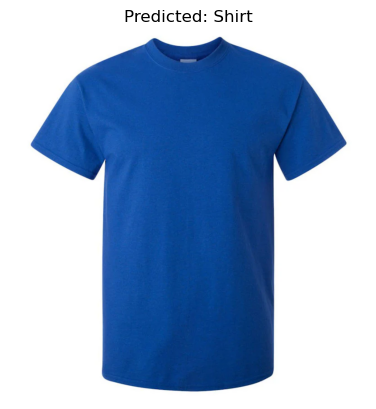

In [15]:
###############################################################################
########################## 8. PREDICT CUSTOM IMAGE ############################
###############################################################################
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((28,28)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    img = Image.open(image_path).convert('L')
    return transform(img).unsqueeze(0)

def predict(image_path, model):
    model.eval()
    image = preprocess_image(image_path).to(device)
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)

    print(f"Predicted: {classes[predicted.item()]}")
    
    # Show image
    img = Image.open(image_path)
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {classes[predicted.item()]}")
    plt.axis('off')
    plt.show()

# Example usage: replace 'your_image.png' with your file path
predict('shirt.png', model)
